<a href="https://colab.research.google.com/github/suryatejabatchu08/Machine-Learning-Lab/blob/main/Lab4_AP23110010549.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [6]:
df = pd.read_csv("/content/DMV_Written_Tests.csv")

In [7]:
df.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [8]:
def minmax(a):
    return (a - a.min()) / (a.max() - a.min())

In [9]:
test_1 = minmax(df['DMV_Test_1'].values)
test_2 = minmax(df['DMV_Test_2'].values)
y = df['Results'].values.astype(float)
X = np.column_stack((test_1, test_2))

In [10]:
X

array([[0.06542784, 0.69465488],
       [0.00326632, 0.19470455],
       [0.08296784, 0.61961779],
       [0.43176427, 0.81600135],
       [0.7019434 , 0.65539214],
       [0.2153456 , 0.37665959],
       [0.44500891, 0.96545859],
       [0.64449684, 0.23365526],
       [0.65989108, 0.83229079],
       [0.77934283, 0.18940757],
       [0.94315096, 0.11165142],
       [0.64433793, 0.        ],
       [0.74887421, 0.67205614],
       [0.56336978, 0.98314328],
       [0.13586997, 0.6655353 ],
       [0.34273413, 0.85846452],
       [0.55914951, 0.32427783],
       [0.5430494 , 0.23547989],
       [0.58195856, 0.91295399],
       [0.67250409, 0.24862534],
       [0.53481039, 0.17922749],
       [0.85450448, 0.51557164],
       [0.29348214, 0.26737325],
       [0.05952839, 0.19931197],
       [0.68605319, 0.56205138],
       [0.46169753, 0.57643769],
       [0.71853306, 0.20827835],
       [0.90377581, 0.12008007],
       [0.45537943, 0.28788555],
       [0.12508388, 0.50379883],
       [0.

### Task 3: Visualize the Data
---

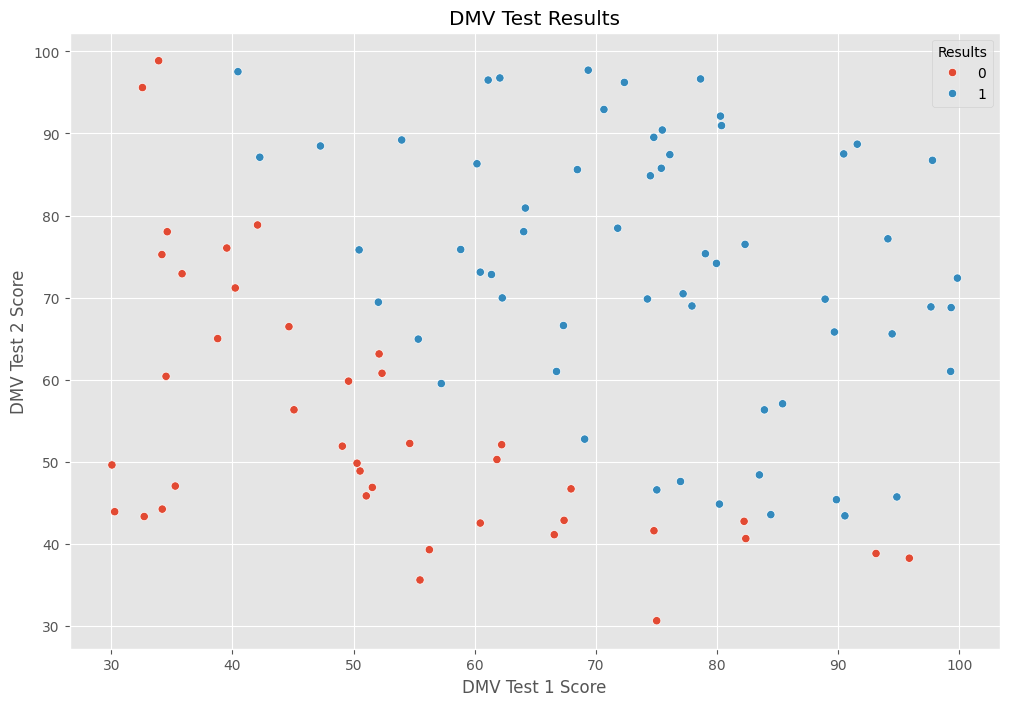

In [11]:
sns.scatterplot(x='DMV_Test_1', y='DMV_Test_2', hue='Results', data=df)
plt.xlabel('DMV Test 1 Score')
plt.ylabel('DMV Test 2 Score')
plt.title('DMV Test Results')
plt.show()

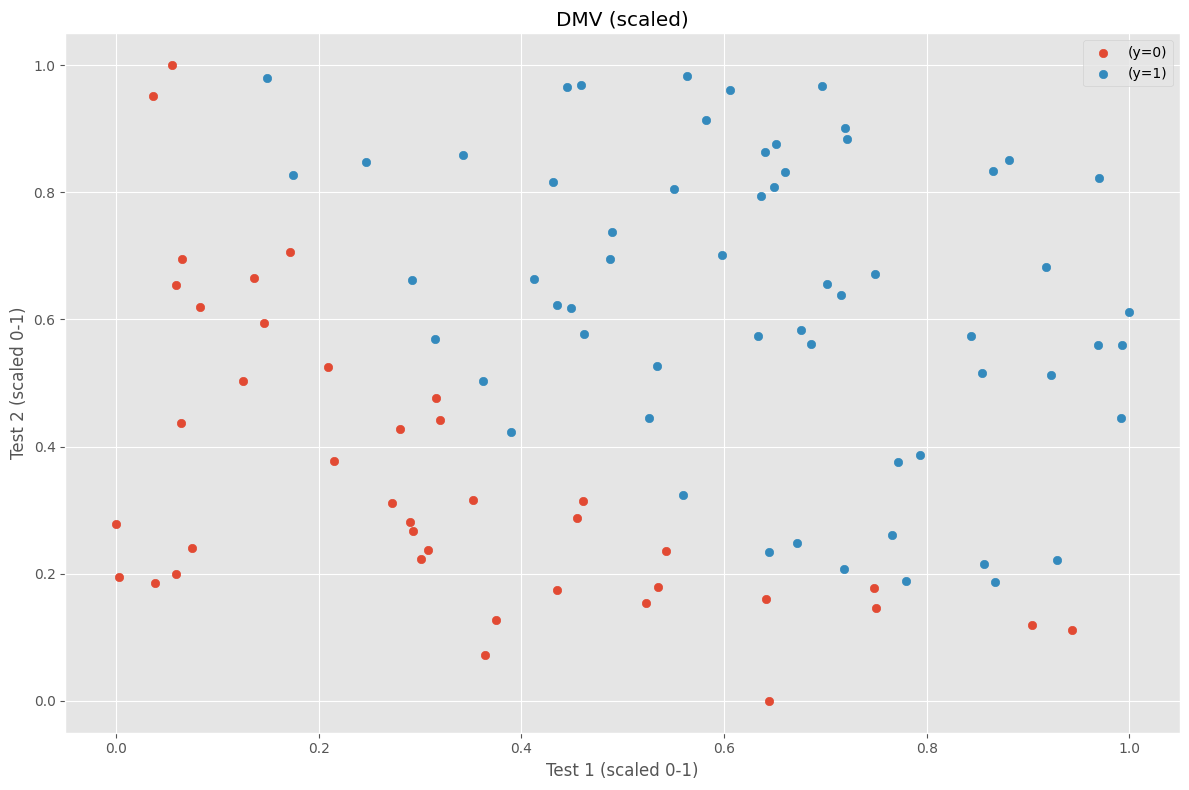

In [12]:
plt.figure()
plt.scatter(X[y==0,0], X[y==0,1], label='(y=0)')
plt.scatter(X[y==1,0], X[y==1,1], label='(y=1)')
plt.xlabel('Test 1 (scaled 0-1)')
plt.ylabel('Test 2 (scaled 0-1)')
plt.legend()
plt.title('DMV (scaled)')
plt.tight_layout()
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

#### Notes

Sigmoid Function maps any input value in between 0 and 1

In [13]:
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

In [14]:
print(sigmoid(5)) #sample test

0.9933071490757153


### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

#### My Changes:

* **Logit**:

$$
z = Xw + b
$$

* **Hypothesis (sigmoid)**:

$$
p = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

* **Cost function (average loss)**:

$$
J(w,b) = -\frac{1}{m} \sum_{i=1}^m \left[y^{(i)} \log(p^{(i)}) + (1-y^{(i)}) \log(1-p^{(i)})\right]
$$

* **Gradients**:

$$
\frac{\partial J}{\partial w} = \frac{1}{m} X^T (p-y), \quad
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (p^{(i)}-y^{(i)})
$$


In [15]:
# Binary Cross Entropy Loss
def cost_function(y,p):
  m = len(y)
  eps = 1e-9  # to avoid log(0)
  return -(1/m)*np.sum(y * np.log(p + eps) + (1 - y) * np.log(1 - p + eps))

In [ ]:
# A.K.A Loss Function
def cost_function(x,y):
  m = len(y)
  return -(1/m)*np.sum(y*np.log(x) + (1-y)*np.log(1-x))

In [16]:
def compute_cost_and_gradient(X, y, w, b):
    m = len(y)
    z = X @ w + b
    p = sigmoid(z)

    # cost
    J = cost_function(p, y)

    # gradients
    dw = (1/m) * (X.T @ (p - y))
    db = (1/m) * np.sum(p - y)

    return J, dw, db


### Task 6: Cost and Gradient at Initialization
---

We start with:

* $w = 0$, $b = 0$
* Compute initial cost $J(w, b)$ and gradients.

In [17]:
# Initialize w and b
w = np.zeros(X.shape[1])
b = 0

J_init, dw_init, db_init = compute_cost_and_gradient(X, y, w, b)

print("Initial Cost J(w,b):", J_init)
print("Initial dw:", dw_init)
print("Initial db:", db_init)

Initial Cost J(w,b): 10.361632917973207
Initial dw: [-0.12904484 -0.12015491]
Initial db: -0.1


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

#### My Changes:
Update rule:

$$
w := w - \eta \, dw, \quad b := b - \eta \, db
$$

where $\eta$ is the learning rate.

In [18]:
''' def gradient_descent(X, y, w, b, lr=0.1, epochs=100):
    losses = []

    for i in range(epochs):
        J, dw, db = compute_cost_and_gradient(X, y, w, b)

        # update
        w -= lr * dw
        b -= lr * db

        losses.append(J)

    return w, b, losses

# Run gradient descent
w, b, losses = gradient_descent(X, y, w=np.zeros(X.shape[1]), b=0, lr=0.1, epochs=200) '''

' def gradient_descent(X, y, w, b, lr=0.1, epochs=100):\n    losses = []\n\n    for i in range(epochs):\n        J, dw, db = compute_cost_and_gradient(X, y, w, b)\n\n        # update\n        w -= lr * dw\n        b -= lr * db\n\n        losses.append(J)\n\n    return w, b, losses\n\n# Run gradient descent\nw, b, losses = gradient_descent(X, y, w=np.zeros(X.shape[1]), b=0, lr=0.1, epochs=200) '

In [19]:
# --- Train and save history ---
def train_with_history(X, y, lr=0.1, epochs=100):
    m, d = X.shape
    w = np.zeros(d)
    b = 0
    hist = []

    for ep in range(epochs):
        # Calculate predicted probabilities
        p = sigmoid(X @ w + b)

        # Ensure compute_cost_and_gradient is called with w and b
        J, dw, db = compute_cost_and_gradient(X, y, w, b) # Keep this for gradient calculation

        # Pass the predicted probabilities 'p' to cost_function
        loss = cost_function(p, y)
        hist.append((ep, w.copy(), b, loss))


        w -= lr * dw
        b -= lr * db

        if ep % 10 == 0 or ep == epochs-1:
            # Use np.array_str to format the array 'w'
            print(f"epoch {ep:3d} | loss={loss:.4f} | w={np.array_str(w, precision=4)} | b={b:.4f}")

    hist_df = pd.DataFrame({
        "epoch": [h[0] for h in hist],
        "w1": [h[1][0] for h in hist],
        "w2": [h[1][1] for h in hist],
        "b":  [h[2] for h in hist],
        "loss": [h[3] for h in hist],
    })

    return w, b, hist_df

In [23]:
w, b, losses = train_with_history(X, y, lr=0.7, epochs=5000)

epoch   0 | loss=10.3616 | w=[0.0903 0.0841] | b=0.0700
epoch  10 | loss=9.0875 | w=[0.5701 0.4993] | b=0.0222
epoch  20 | loss=8.6705 | w=[0.8866 0.7584] | b=-0.2586
epoch  30 | loss=8.3208 | w=[1.1724 0.9951] | b=-0.5305
epoch  40 | loss=8.0039 | w=[1.4366 1.2175] | b=-0.7827
epoch  50 | loss=7.7164 | w=[1.6818 1.4272] | b=-1.0166
epoch  60 | loss=7.4557 | w=[1.9102 1.6253] | b=-1.2343
epoch  70 | loss=7.2194 | w=[2.1235 1.8126] | b=-1.4376
epoch  80 | loss=7.0049 | w=[2.3234 1.9903] | b=-1.6281
epoch  90 | loss=6.8097 | w=[2.5114 2.159 ] | b=-1.8072
epoch 100 | loss=6.6316 | w=[2.6886 2.3196] | b=-1.9760
epoch 110 | loss=6.4688 | w=[2.8563 2.4727] | b=-2.1356
epoch 120 | loss=6.3195 | w=[3.0152 2.619 ] | b=-2.2869
epoch 130 | loss=6.1820 | w=[3.1663 2.7589] | b=-2.4307
epoch 140 | loss=6.0553 | w=[3.3104 2.8931] | b=-2.5677
epoch 150 | loss=5.9379 | w=[3.4479 3.0218] | b=-2.6985
epoch 160 | loss=5.8291 | w=[3.5795 3.1456] | b=-2.8235
epoch 170 | loss=5.7278 | w=[3.7057 3.2648] | b=-

### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

We plot cost function $J(w,b)$ vs. number of iterations.

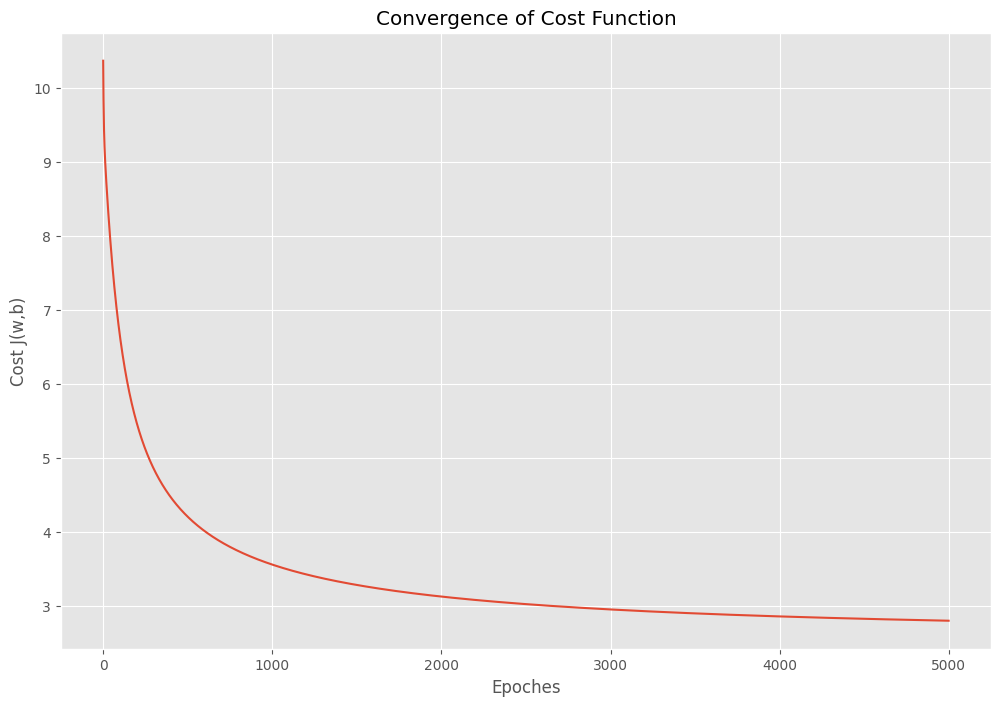

In [24]:
import matplotlib.pyplot as plt

plt.plot(losses['loss'])
plt.xlabel("Epoches")
plt.ylabel("Cost J(w,b)")
plt.title("Convergence of Cost Function")
plt.show()

### Task 9: Plotting the decision boundary
---

# $h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

#### My Changes:
Decision boundary is given by:

$$
p = \sigma(z), \quad z = Xw + b
$$

Classify as 1 if $p \geq 0.5$, i.e. $z \geq 0$.

For 2D features ($x_1, x_2$):

$$
w_1 x_1 + w_2 x_2 + b = 0
\quad\Rightarrow\quad
x_2 = -\frac{b + w_1 x_1}{w_2}
$$

In [25]:
def boundary_points(w, b, x1_min=0.0, x1_max=1.0, num=200):
    x1 = np.linspace(x1_min, x1_max, num=num)
    if abs(w[1]) < 1e-12:  # avoid divide by zero
        x1_line = np.full_like(x1, -b/(w[0] if abs(w[0])>1e-12 else 1e-12))
        x2_line = np.linspace(0.0, 1.0, num=num)
        return x1_line, x2_line
    x2 = -(w[0]*x1 + b) / w[1]
    return x1, x2

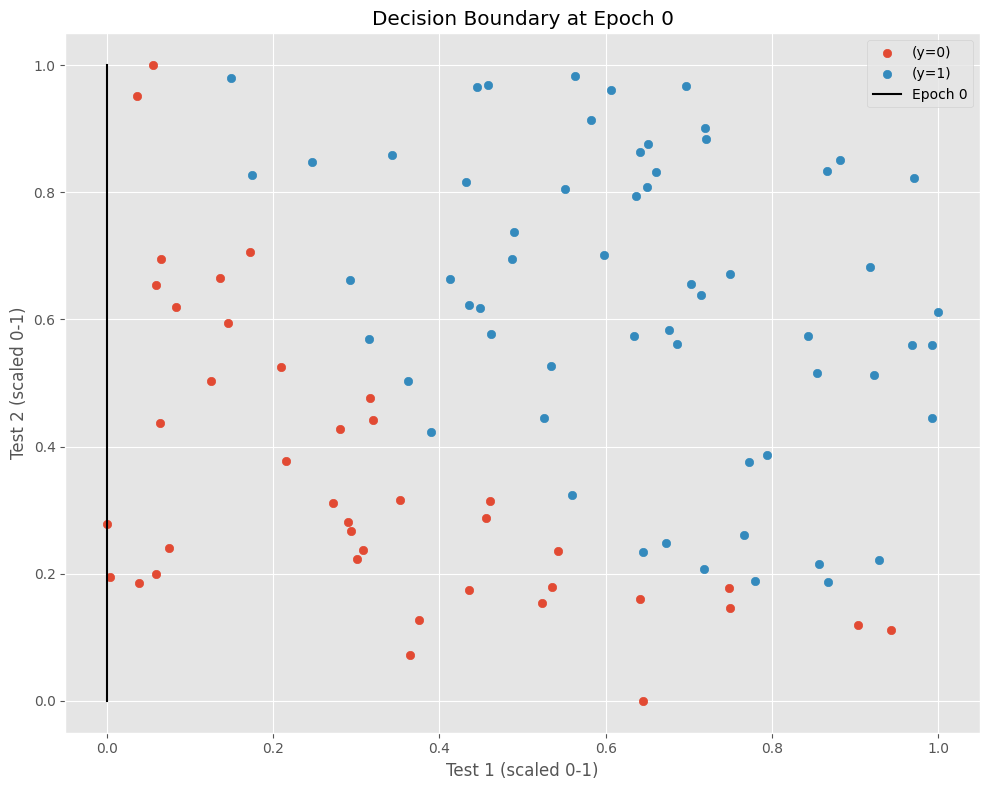

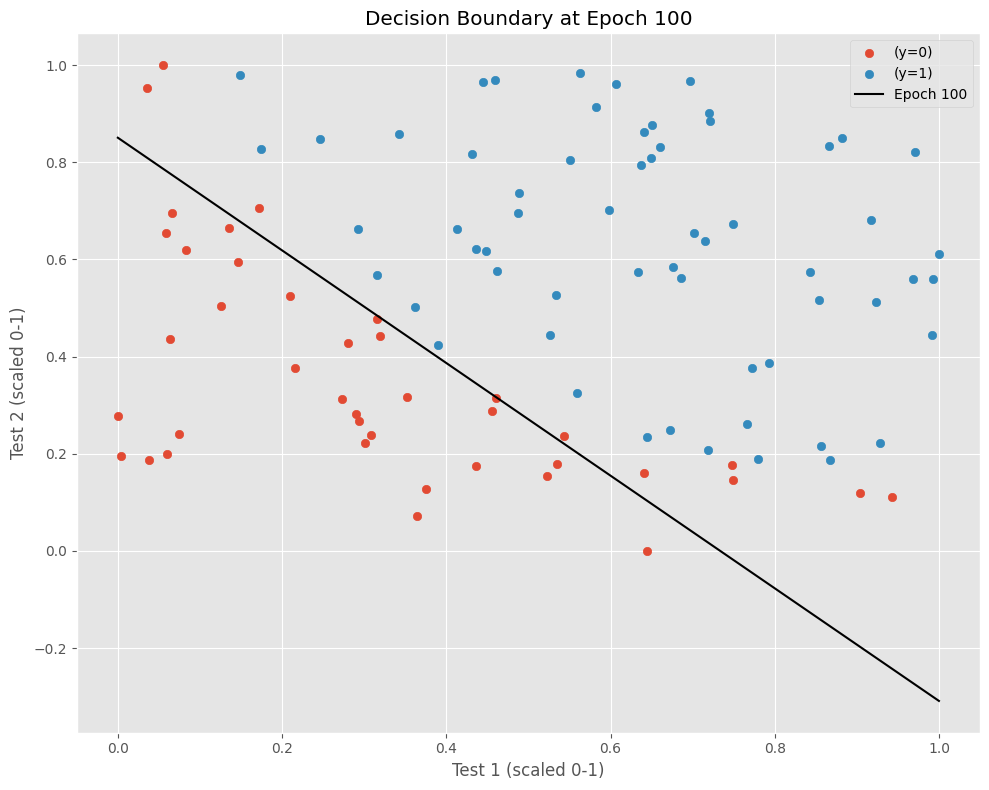

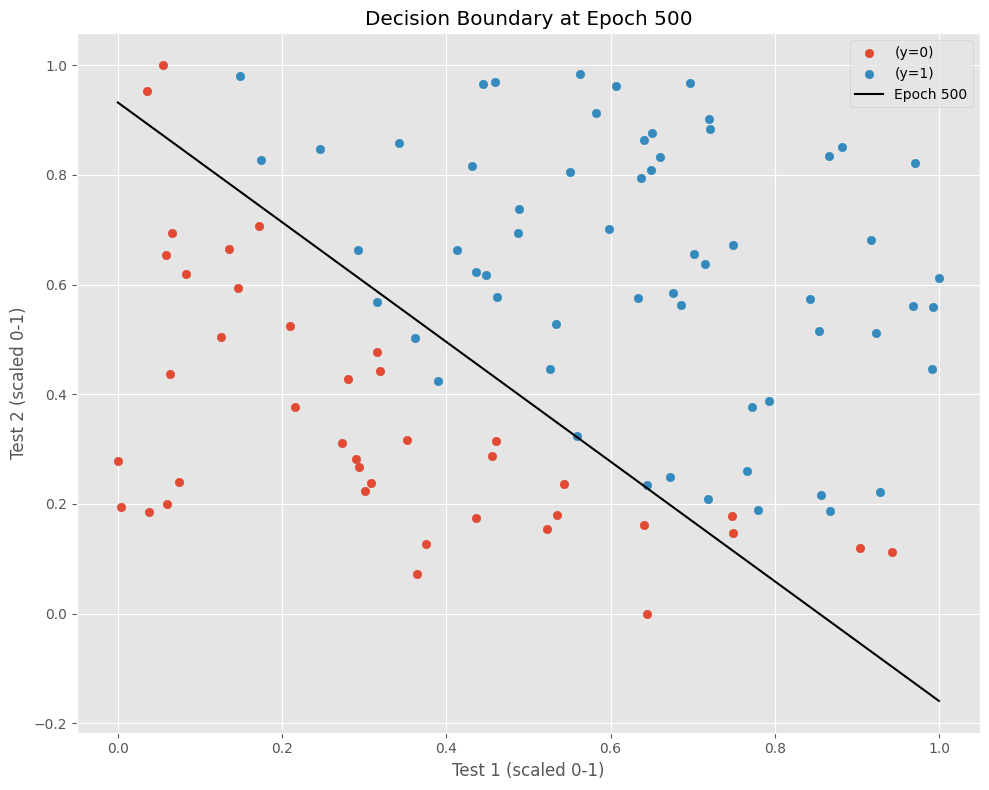

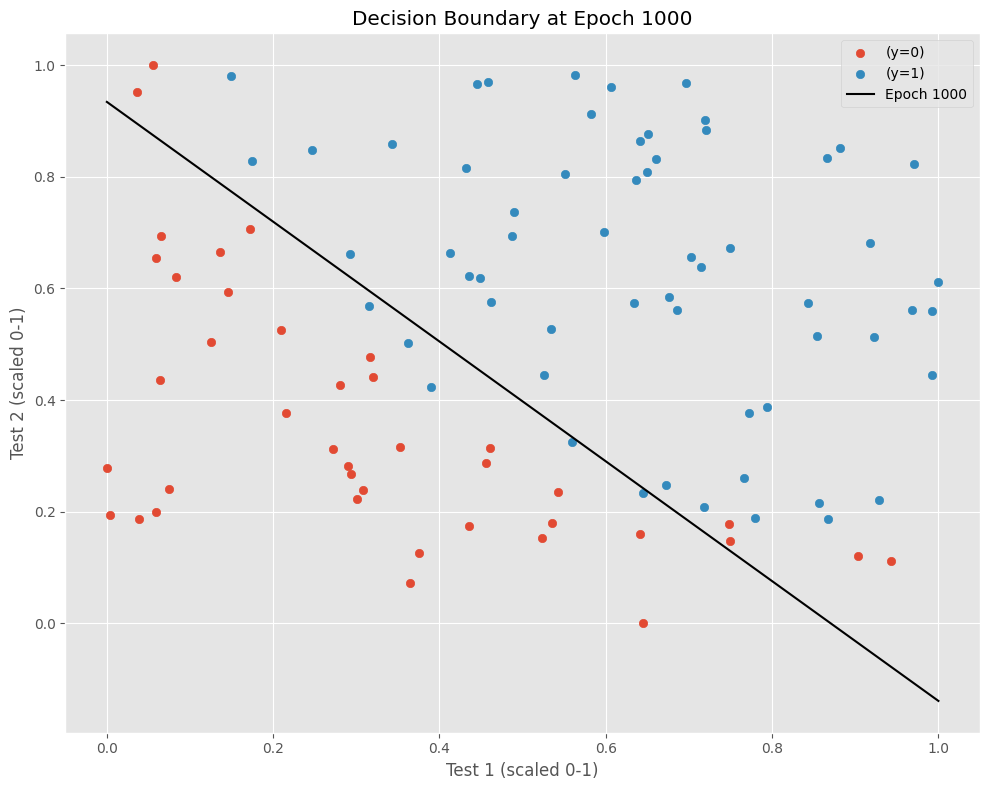

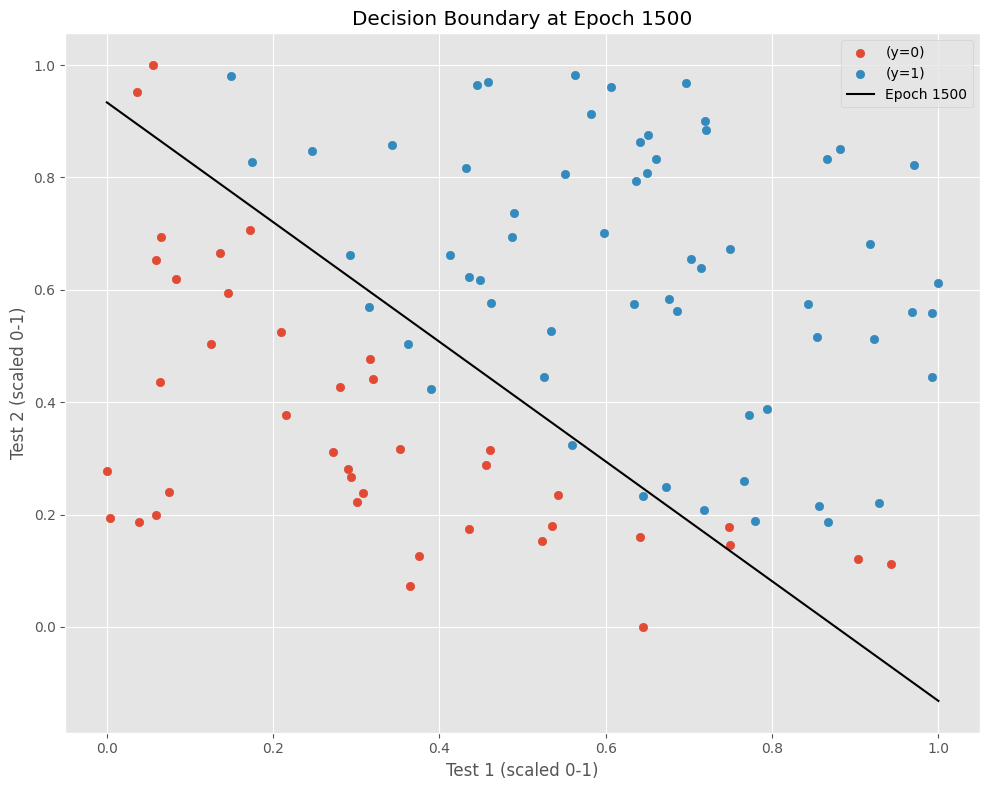

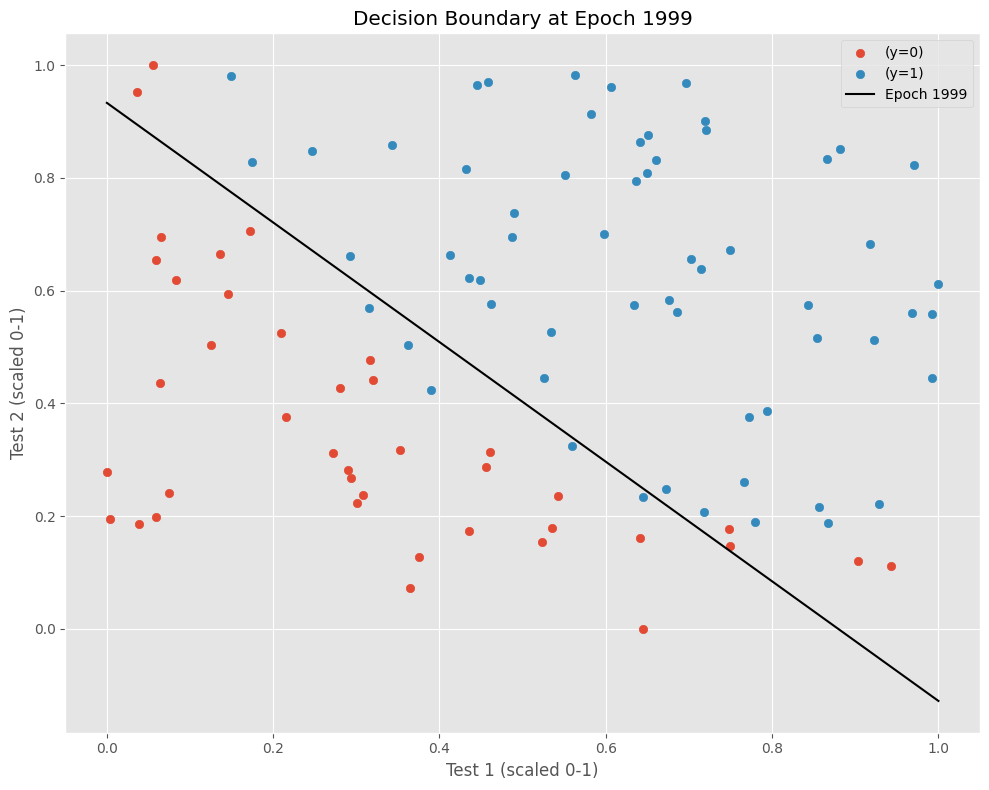

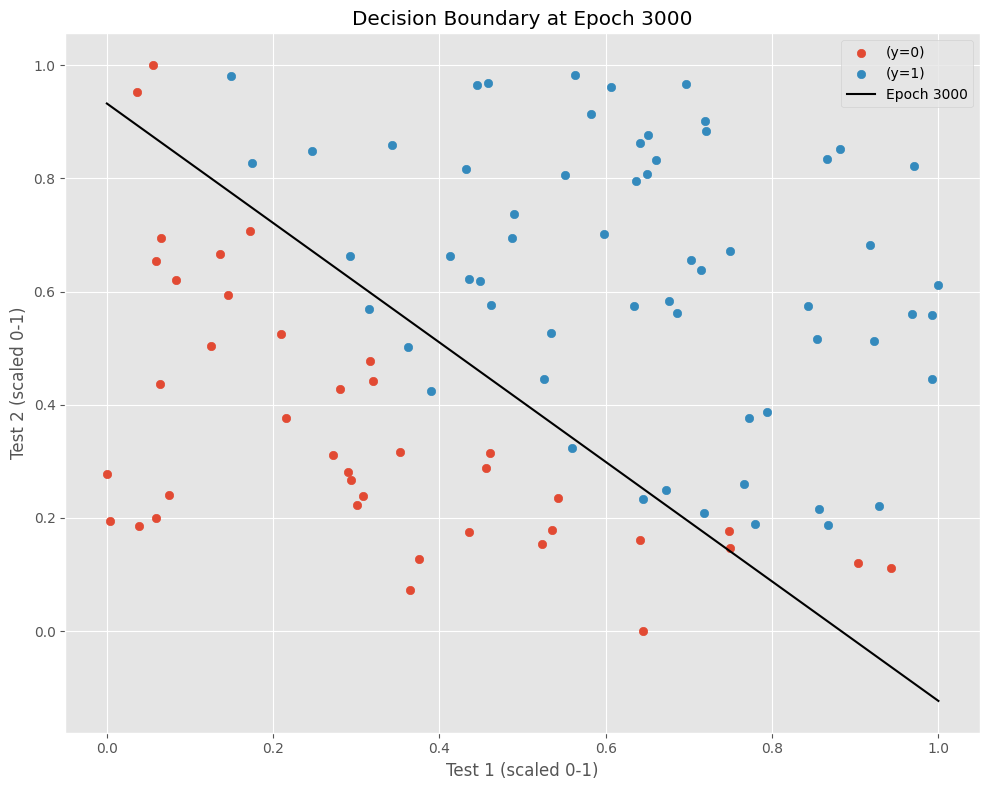

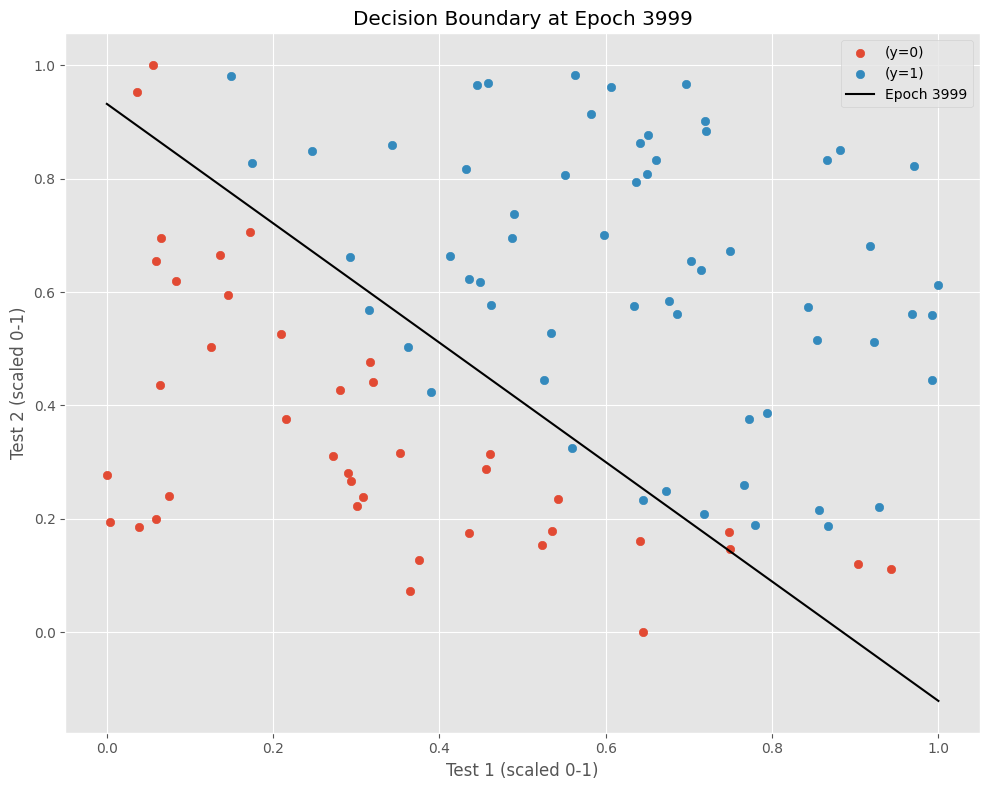

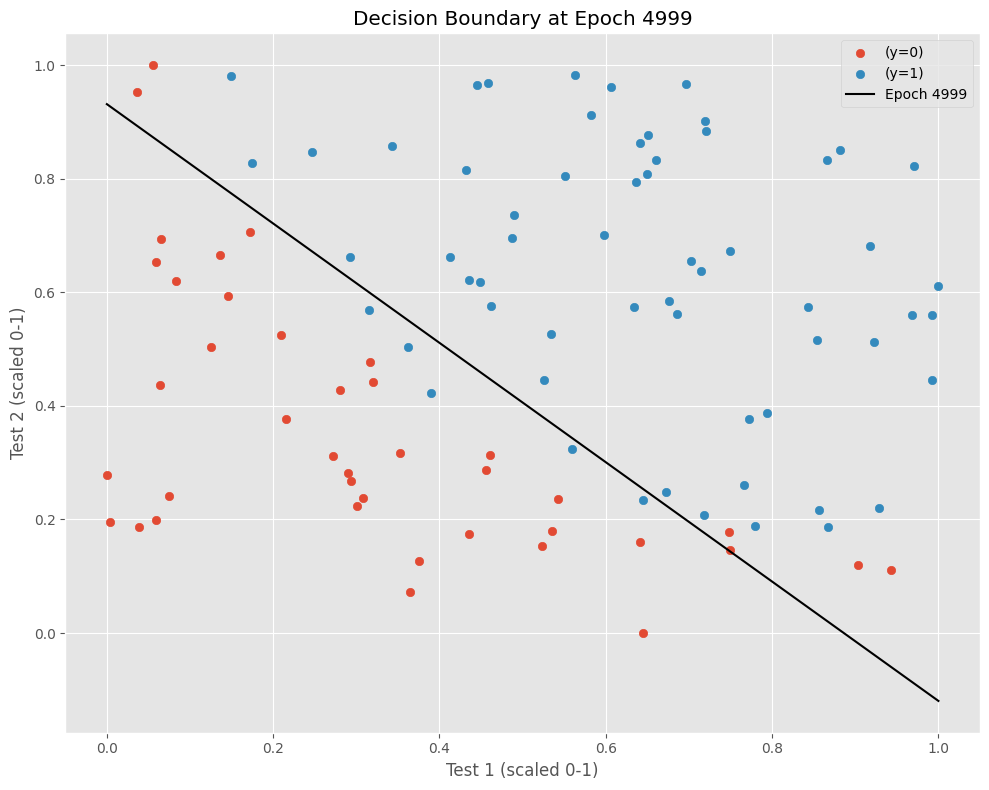

In [27]:
# Plot decision boundary for a few selected epochs and the last epoch
selected_epochs = [0, 100, 500, 1000, 1500, 1999, 3000, 3999, 4999] # Select some epochs to visualize

for epoch in selected_epochs:
    plt.figure(figsize=(10, 8))
    plt.scatter(X[y==0,0], X[y==0,1], label='(y=0)')
    plt.scatter(X[y==1,0], X[y==1,1], label='(y=1)')

    # Get w and b for the selected epoch from hist_df
    epoch_data = losses[losses['epoch'] == epoch].iloc[0]
    w_epoch = np.array([epoch_data['w1'], epoch_data['w2']])
    b_epoch = epoch_data['b']

    # Get boundary points
    x1_boundary, x2_boundary = boundary_points(w_epoch, b_epoch, x1_min=X[:,0].min(), x1_max=X[:,0].max())

    plt.plot(x1_boundary, x2_boundary, "k-", label=f'Epoch {epoch}')

    plt.xlabel('Test 1 (scaled 0-1)')
    plt.ylabel('Test 2 (scaled 0-1)')
    plt.title(f'Decision Boundary at Epoch {epoch}')
    plt.legend()
    plt.tight_layout()
    plt.show()

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

#### My Changes:
Final hypothesis:

$$
h(x) = \sigma(w^\top x + b)
$$

Prediction rule:

$$
\hat{y} =
\begin{cases}
1 & \text{if } h(x) \geq 0.5 \\
0 & \text{if } h(x) < 0.5
\end{cases}
$$

In [28]:
def predict(X, w, b):
    p = sigmoid(X @ w + b)
    return (p >= 0.5).astype(int)

y_pred = predict(X, w, b)
accuracy = (y_pred == y).mean()
print('Final w:', w, '  b:', round(b,4))
print(f'Training accuracy: {accuracy*100:.2f}%')

Final w: [12.78722757 12.16923952]   b: -11.3335
Training accuracy: 89.00%
